In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from metrics_toolbox import EvaluatorBuilder
import numpy as np

## 1. Multivariate Regression

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)

In [3]:
# Load California housing dataset and create multi-output regression
X, y = fetch_california_housing(return_X_y=True)

# Down sample for testing
X = X[:2000]
y = y[:2000]

# Create two targets: original house value and a synthetic derived target for demonstration
y_multi = np.column_stack([y, y * 0.8 + np.random.randn(len(y)) * 0.5])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)


print(f"Training set size: {X_train.shape}")
print(f"Target 1 range: [{y_train[:, 1].min():.2f}, {y_train[:, 1].max():.2f}]")
print(f"Test set size: {X_test.shape}")
print(f"Target 0 range: [{y_train[:, 0].min():.2f}, {y_train[:, 0].max():.2f}]")
print(f"Number of targets: {y_train.shape[1]}")

Training set size: (1400, 8)
Target 1 range: [-0.59, 5.03]
Test set size: (600, 8)
Target 0 range: [0.38, 5.00]
Number of targets: 2


## Train a Regression Model

In [4]:
# Train Ridge regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model = model.fit(X_train, y_train)

## Build Evaluator with Regression Metrics

In [5]:
# Build evaluator with regression metrics for multiple targets
evaluator = (
    EvaluatorBuilder()
    .add_metric("mse_target", target_name="house_value", reducers=["mean", "std"])
    .add_metric("rmse_target", target_name="house_value", reducers=["mean", "min", "max"])
    .add_metric("mse_target", target_name="derived_target", reducers=["mean", "std"])
    .add_metric("rmse_target", target_name="derived_target", reducers=["mean", "min", "max"])
    .add_metric("rmse_macro")
    .add_metric("mse_macro")
).build()

## Evaluate Model

In [6]:
# Evaluate on test set
evaluator.add_model_evaluation(model, X_test, y_test, column_names=["house_value", "derived_target"])

# Evaluate on training set
evaluator.add_model_evaluation(model, X_train, y_train, column_names=["house_value", "derived_target"])

## View Results

In [7]:
# Get results
result = evaluator.get_results()

# Display metric values
print("Metric Values:")
display(result['values'])

# Display steps/evaluations
print("\nEvaluation Steps:")
display(result['steps'])

print("\nPlots:")
display(result['figures'])

Metric Values:


{'mse_house_value_mean': 0.10569083484527801,
 'mse_house_value_std': 0.07963524246003682,
 'rmse_house_value_mean': 0.29595630061181144,
 'rmse_house_value_min': 0.16141744758619245,
 'rmse_house_value_max': 0.43049515363743046,
 'mse_derived_target_mean': 0.20742429382636263,
 'mse_derived_target_std': 0.15242796375113798,
 'rmse_derived_target_mean': 0.4171949161174421,
 'rmse_derived_target_min': 0.23451296355473533,
 'rmse_derived_target_max': 0.5998768686801489,
 'rmse_macro_latest': np.float64(0.19796520557046393),
 'mse_macro_latest': np.float64(0.04052596123023293)}


Evaluation Steps:


{'mse_house_value_steps': [np.float64(0.18532607730531483),
  np.float64(0.026055592385241185)],
 'rmse_house_value_steps': [np.float64(0.43049515363743046),
  np.float64(0.16141744758619245)],
 'mse_derived_target_steps': [np.float64(0.3598522575775006),
  np.float64(0.05499633007522463)],
 'rmse_derived_target_steps': [np.float64(0.5998768686801489),
  np.float64(0.23451296355473533)],
 'rmse_macro_steps': [np.float64(0.5151860111587895),
  np.float64(0.19796520557046393)],
 'mse_macro_steps': [np.float64(0.2725891674414075),
  np.float64(0.04052596123023293)]}


Plots:


{'regression_plots': <Figure size 1800x1600 with 8 Axes>}

## Figures
The error is included below the regression lines, by adding padding between the lines.  
Only the lates fold evaluation is used to plot results.

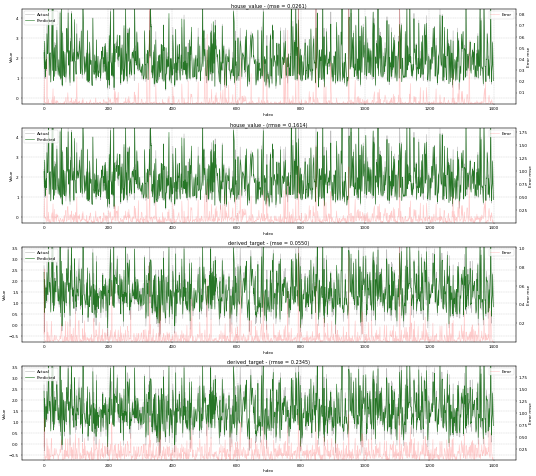

In [8]:
fig = result['figures']['regression_plots']
fig.set_dpi(30)  # Lower DPI for demonstration purposes
fig